In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import openpyxl

In [7]:
data = pd.read_excel("D:\DownLoad\learining courses\DEPI-DS-AI\Different Exercises\Churn_Modelling.xlsx")

data.head()
df=pd.DataFrame(data)
df.to_csv("D:\DownLoad\learining courses\DEPI-DS-AI\Different Exercises\Churn_Modelling.csv")

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:5: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:5: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Omar\AppData\Local\Temp\ipykernel_9400\1821337077.py:1: SyntaxWarning: invalid escape sequence '\D'
  data = pd.read_excel("D:\DownLoad\learining courses\DEPI-DS-AI\Different Exercises\Churn_Modelling.xlsx")
C:\Users\Omar\AppData\Local\Temp\ipykernel_9400\1821337077.py:5: SyntaxWarning: invalid escape sequence '\D'
  df.to_csv("D:\DownLoad\learining courses\DEPI-DS-AI\Different Exercises\Churn_Modelling.csv")


In [8]:
data = data.drop(["RowNumber" , "CustomerId" , "Surname"] , axis = 1)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
from sklearn.preprocessing import LabelEncoder

d_types = dict(data.dtypes)

for name , type_ in d_types.items():
    if str(type_) == 'object':
        Le = LabelEncoder()
        data[name] = Le.fit_transform(data[name])

In [10]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [11]:
remaining_columns = list(data.columns)
remaining_columns.remove("Exited")

In [12]:
X = data[remaining_columns].values 
Y = data['Exited'].values.astype(np.uint8)

In [13]:
from sklearn.model_selection import train_test_split

Xtrain , Xtest , Ytrain , Ytest = train_test_split(X , Y , test_size = 0.2 , random_state = 4)

In [14]:
print(Xtrain.shape , Ytrain.shape)

(8000, 10) (8000,)


In [15]:
from sklearn.tree import DecisionTreeClassifier 

model = DecisionTreeClassifier()
model.fit(Xtrain , Ytrain)

DecisionTreeClassifier()

In [16]:
print("Testing Accuracy : " , model.score(Xtest , Ytest))

Testing Accuracy :  0.782


In [17]:
predictions = model.predict(Xtest)

In [18]:
from sklearn.metrics import confusion_matrix 

matrix = confusion_matrix(Ytest , predictions)
matrix

array([[1364,  240],
       [ 196,  200]])

Improve

In [19]:
value_counts = dict(data["Exited"].value_counts())
print(value_counts)

{0: np.int64(7963), 1: np.int64(2037)}


In [20]:
for key , value in value_counts.items():
    value_counts[key] = value/len(data)

print(value_counts)

{0: np.float64(0.7963), 1: np.float64(0.2037)}


In [21]:
class_weights = {}

for key , value in value_counts.items():
    class_weights[key] = sum(value_counts.values()) - value / sum(value_counts.values())

class_weights

{0: np.float64(0.2037), 1: np.float64(0.7963)}

In [22]:
model = DecisionTreeClassifier(max_depth = 8 , class_weight = class_weights)
model.fit(Xtrain , Ytrain)

DecisionTreeClassifier(class_weight={0: np.float64(0.2037),
                                     1: np.float64(0.7963)},
                       max_depth=8)

In [23]:
print("Testing Accuracy : " , model.score(Xtest , Ytest))

Testing Accuracy :  0.7835


In [24]:
predictions = model.predict(Xtest)

In [25]:
from sklearn.metrics import confusion_matrix 

matrix = confusion_matrix(Ytest , predictions)
matrix

array([[1272,  332],
       [ 101,  295]])

Visualizing Tree

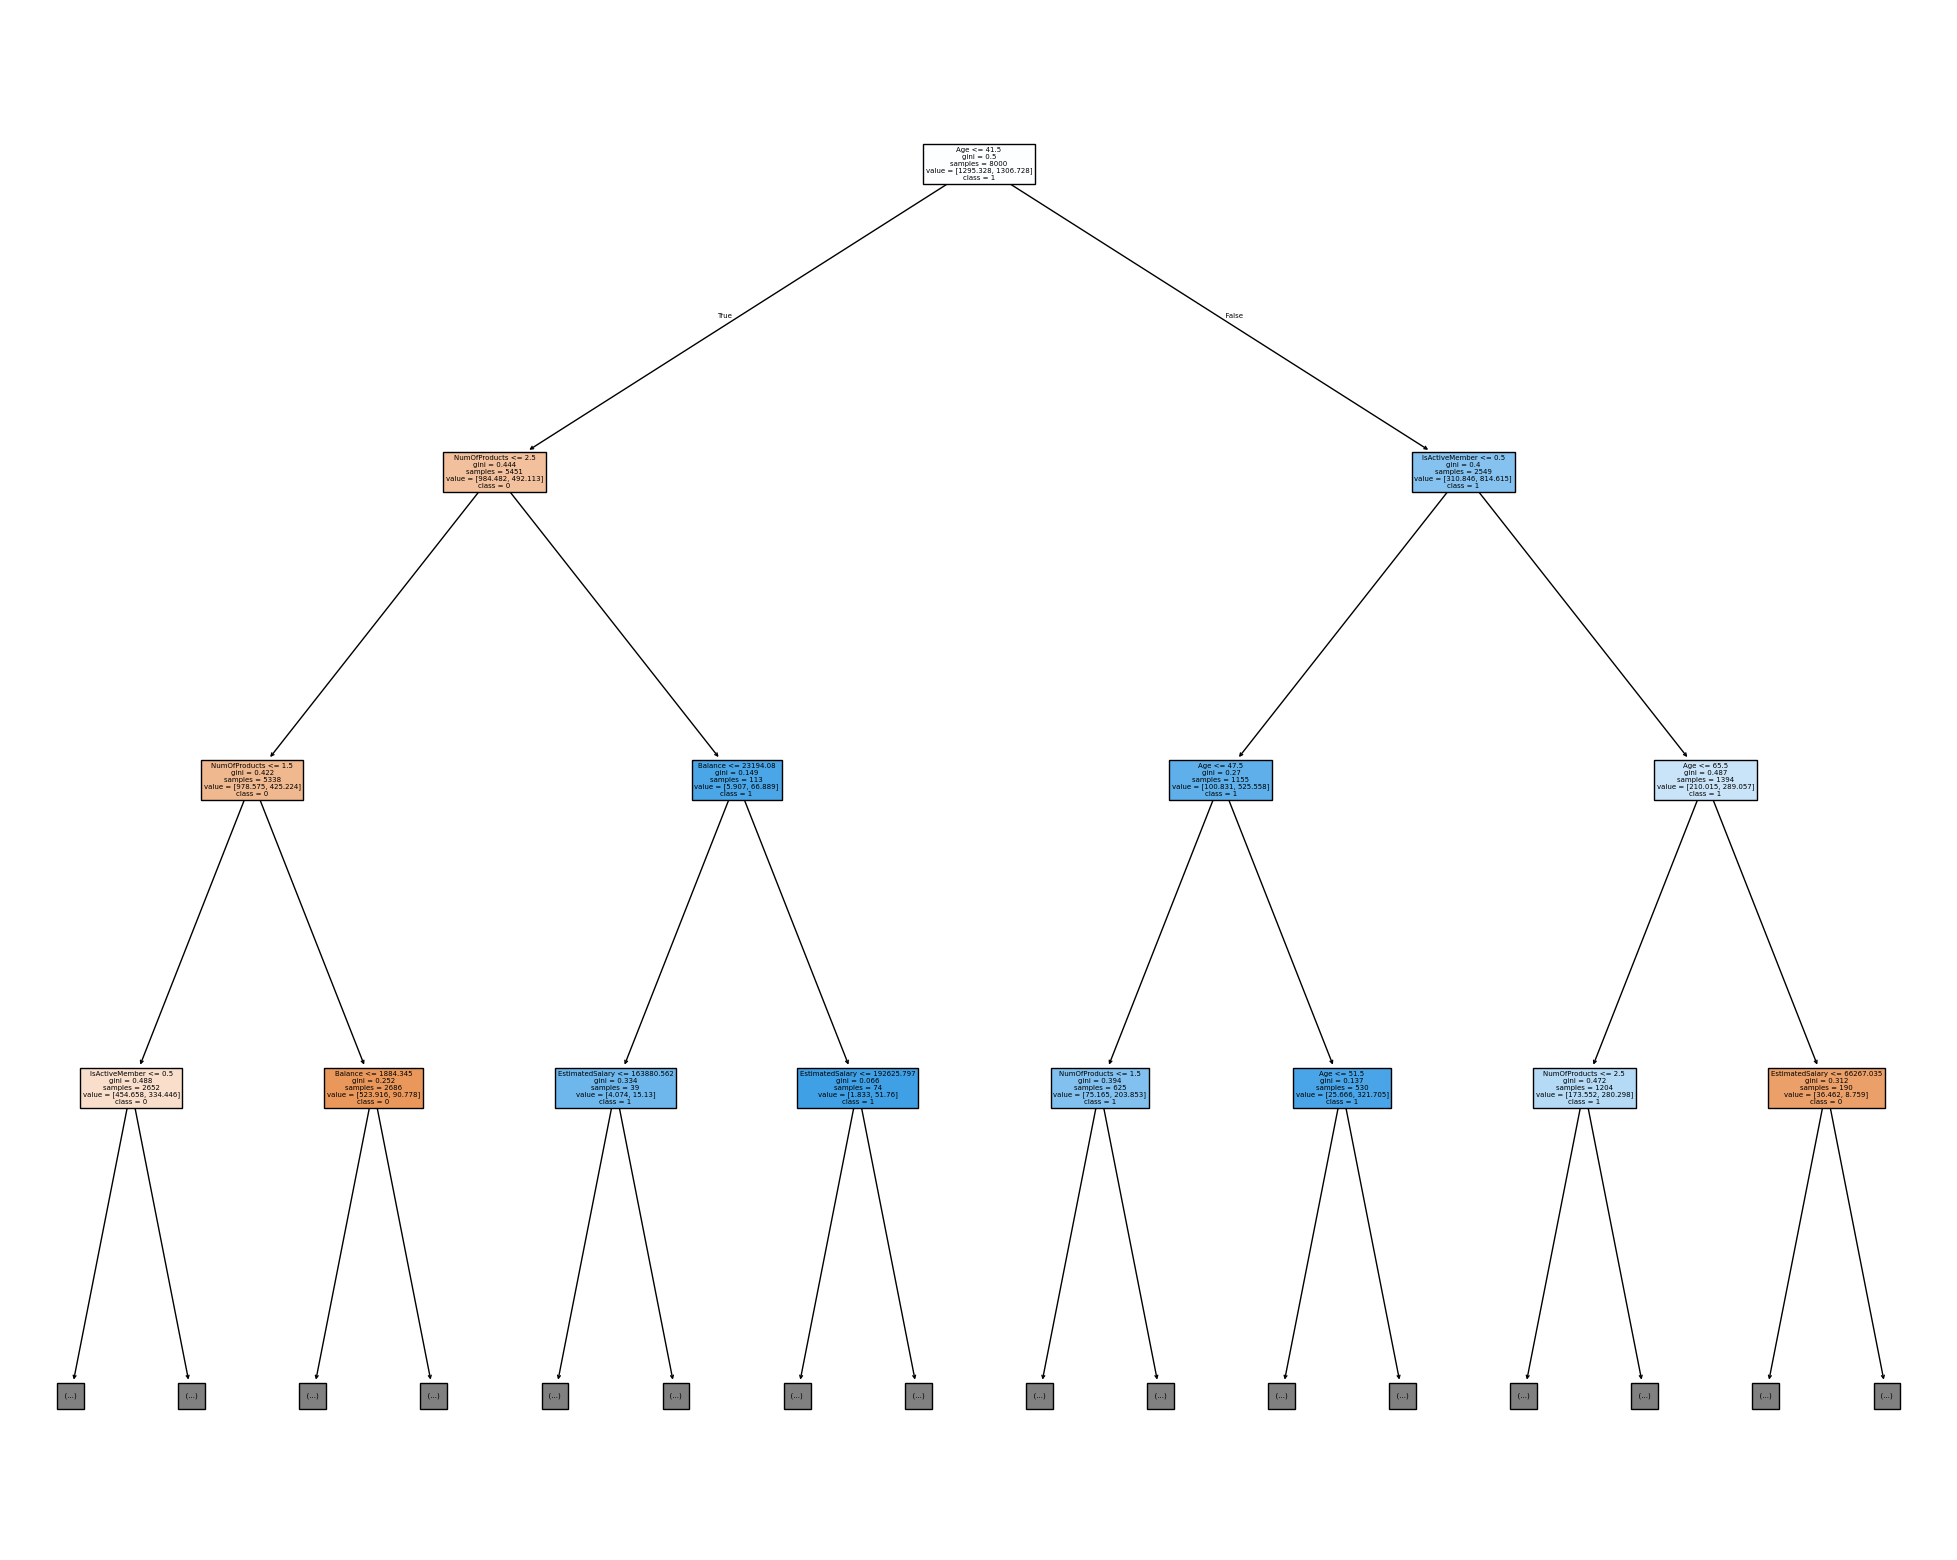

In [26]:
from sklearn import tree

fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, 
                   max_depth=3,
                   feature_names=data.columns[:-1],  
                   class_names=['0','1'],
                   filled=True)